In [1]:
from pathlib import Path

thispath = Path('__file__').resolve()
base_path = thispath.parent.parent
import sys; sys.path.insert(0, str(base_path))
from dataset.copd_dataset import DirLabCOPD

import matplotlib.pyplot as plt
from tqdm import tqdm

  0%|          | 0/4 [00:00<?, ?it/s]

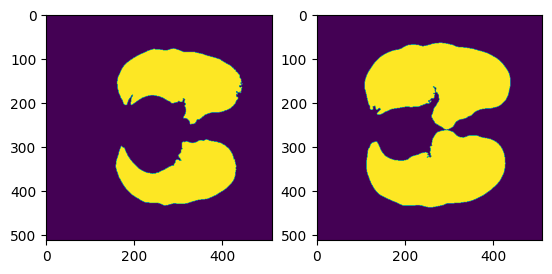

 25%|██▌       | 1/4 [00:02<00:07,  2.45s/it]

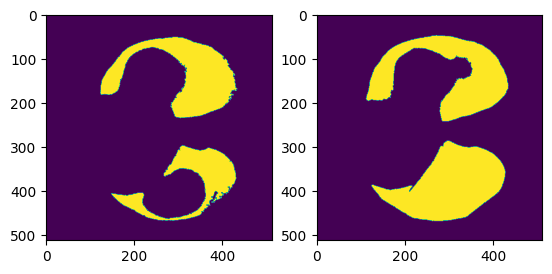

 50%|█████     | 2/4 [00:05<00:05,  2.62s/it]

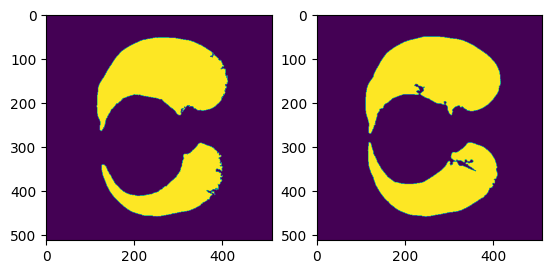

 75%|███████▌  | 3/4 [00:07<00:02,  2.46s/it]

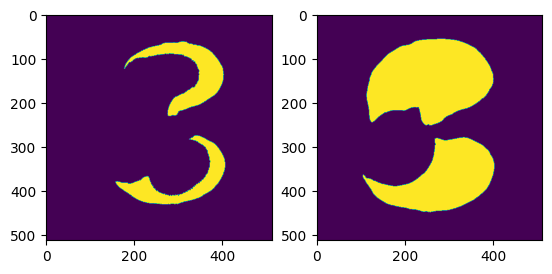

100%|██████████| 4/4 [00:10<00:00,  2.62s/it]


In [3]:
import matplotlib.pyplot as plt

data = DirLabCOPD(
    data_path=base_path/'data',
    cases=['all'],
    partitions=['train'],
    return_lm_mask=True,
    normalization_cfg=None,
    return_lung_masks=True
)

for i in tqdm(range(len(data))):
    sample = data[i]
    plt.figure()
    plt.subplot(121)
    plt.imshow(sample['e_lung_mask'][:, :, 75])
    plt.subplot(122)
    plt.imshow(sample['i_lung_mask'][:, :, 75])
    plt.show()


In [9]:
from preprocess.preprocess import get_lungs_mask
import numpy as np

for i in tqdm(range(len(data))):
    sample = data[i]
    i_img = np.moveaxis(sample['i_img'], [0, 1, 2], [2, 1, 0])
    lungs, A5, B5, C5, D5, A25, B25, C25, D25 = get_lungs_mask(i_img, True)
    break

  0%|          | 0/4 [00:05<?, ?it/s]


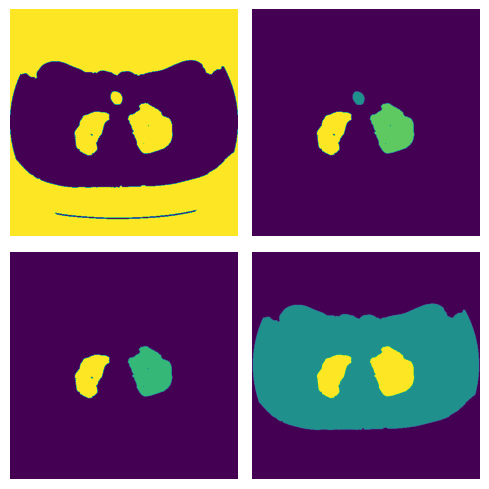

In [19]:
fg, ax = plt.subplots(2,2, figsize=(5,5))
ax[0,0].imshow(A5)
ax[0,0].axis('off')
ax[0,1].imshow(B5)
ax[0,1].axis('off')
ax[1,0].imshow(C5)
ax[1,0].axis('off')
ax[1,1].imshow(D5)
ax[1,1].axis('off')
plt.tight_layout()
plt.savefig('/home/jseia/Desktop/MAIA/classes/spain/mira/final_project/mira_final_project/experiments/elastix/lung_segementation2.png', bbox_inches='tight')

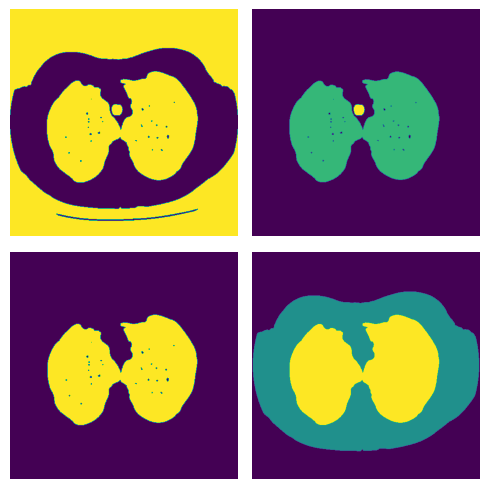

In [18]:
fg, ax = plt.subplots(2,2, figsize=(5,5))
ax[0,0].imshow(A25)
ax[0,0].axis('off')
ax[0,1].imshow(B25)
ax[0,1].axis('off')
ax[1,0].imshow(C25)
ax[1,0].axis('off')
ax[1,1].imshow(D25)
ax[1,1].axis('off')
plt.tight_layout()
plt.savefig('/home/jseia/Desktop/MAIA/classes/spain/mira/final_project/mira_final_project/experiments/elastix/lung_segementation1.png', bbox_inches='tight')